<a href="https://colab.research.google.com/github/natasaivic/ml/blob/main/named_entity_recognition_spaCy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

spaCy is an open-source Python library for advanced natural language processing. 

It has pretrained models with entities.
It is an information extraction technique that automatically identifies named entities in a text and classifies them into predefined categories. 

Entities can be: 
* people
* organization
* locations
* times
* monetary values 
* and more, depending on the domain that particular model is pretrained on. 

The model is trained to understand the context where one word fits in a relation to other words in a structure of text, as it looked at millions of the examples historically. 
If a certain word was recognized as time entity for most of the time when it was surrounded by the same text, the model learned the approximate location of the word as a most common. This is how it could make an accurate guess that the certain word is the time entity. 


In [1]:
# Install spaCy
!pip install spacy download en_core_web_sm

In [25]:
# Import libraries and module
import spacy
import pandas as pd
import seaborn as sns

from spacy import displacy 

In [3]:
# Text example to test the extraction
# Paste any text that you are interested in Named Entity Recognition
text = "Zuckerberg is co-founder and chief executive of Meta Platforms, the company behind Facebook -- the world's largest social-network. The Menlo Park, California-based business had revenue of $86 billion in 2020 and has about 2.8 billion monthly users. Its initial public offering in 2012 was the biggest-ever technology IPO at the time."

In [16]:
# Load the model "en_core_web_sm", the language model that we want to specify
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [17]:
# Find named entities in the text that we randomly chose
displacy.render(doc, style='ent', jupyter=True)

In [6]:
# Extract the entities that are found within the document itself 
doc.ents

(Zuckerberg,
 Meta Platforms,
 Facebook,
 The Menlo Park,
 California,
 $86 billion,
 2020,
 about 2.8 billion,
 monthly,
 2012)

In [8]:
# Label the entities
for ent in doc.ents:
  print(ent, ent.start_char, ent.end_char, ent.label_)

Zuckerberg 0 10 PERSON
Meta Platforms 48 62 ORG
Facebook 83 91 ORG
The Menlo Park 131 145 LOC
California 147 157 GPE
$86 billion 188 199 MONEY
2020 203 207 DATE
about 2.8 billion 216 233 CARDINAL
monthly 234 241 DATE
2012 280 284 DATE


In [7]:
# List people found in the document
people_list = []

for ent in doc.ents:
  if ent.label_ == 'PERSON':
    people_list.append(ent)

print(people_list)

[Zuckerberg]


In [9]:
# List the entities and list the labels
list_text = []
list_ents = []

for ent in doc.ents:
  list_text.append(ent.text)
  list_ents.append(ent.label_)

print(list_text)
print(list_ents)

['Zuckerberg', 'Meta Platforms', 'Facebook', 'The Menlo Park', 'California', '$86 billion', '2020', 'about 2.8 billion', 'monthly', '2012']
['PERSON', 'ORG', 'ORG', 'LOC', 'GPE', 'MONEY', 'DATE', 'CARDINAL', 'DATE', 'DATE']


In [21]:
# Create Pandas dataframe using zip() for zipping two lists
df = pd.DataFrame(list(zip(list_text, list_ents)),
               columns =['text', 'entity'])

In [22]:
df

,text,entity
0,Zuckerberg,PERSON
1,Meta Platforms,ORG
2,Facebook,ORG
3,The Menlo Park,LOC
4,California,GPE
5,$86 billion,MONEY
6,2020,DATE
7,about 2.8 billion,CARDINAL
8,monthly,DATE
9,2012,DATE


In [23]:
# Entities count
df.entity.value_counts()

DATE        3
ORG         2
PERSON      1
LOC         1
GPE         1
MONEY       1
CARDINAL    1
Name: entity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


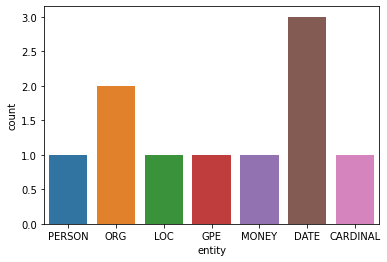

In [30]:
sns.countplot(df.entity)

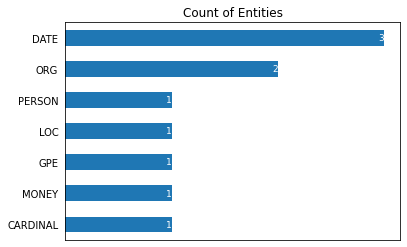

In [66]:
make_counts = df.entity.value_counts()
counts = pd.Series(make_counts.iloc[::-1])
ax = (counts
    .plot.barh()
)
ax.tick_params(bottom=False, labelbottom=False,
              left=False)
for i, (pos, value) in enumerate(counts.iteritems()):
    ax.text(value, i, str(value),
            color='white',
            fontdict={'fontsize':9},
            va='center', ha='right'
           )
_ = ax.set_title('Count of Entities')